In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yaml

In [85]:
stream = open("../../beamline_estimation/config/pca_x_2022.yaml", "r", encoding="utf-8")
config_dictionary_pca = yaml.safe_load(stream)

In [86]:
df = pd.read_csv('../../../data_vdm_2022/output_data/df_counters_wo_offset.csv')

In [87]:
bin_names = config_dictionary_pca["all_columns"]
#bin_names = [w.replace("A", "O") for w in bin_names]
#bin_names = [w.replace("B", "I") for w in bin_names]
bin_names = ["M" + w for w in bin_names]

In [88]:
df['TS'] = pd.to_datetime(df['TS'], format='%Y-%m-%d %H:%M:%S')
df.set_index('TS', inplace=True)

In [89]:
df = df.between_time("10:07:33","10:20:15") #"10:07:01","10:21:54" #"10:07:33","10:20:15"

In [90]:
df_same = df[abs(df["Nominal_Displacement_B1_xingPlane"]-df["Nominal_Displacement_B2_xingPlane"])<0.001]

In [91]:
counters = [tmp for tmp in df_same.columns if tmp.startswith("M")]

In [92]:
len(counters)

160

In [93]:
df_counters = df_same[counters]

In [94]:
df_lumi = df_same["lumi"]

In [95]:
df_counters = df_counters.div(df_lumi, axis=0)

In [96]:
df_counters['Nominal_Displacement_B1_xingPlane'] = df_same['Nominal_Displacement_B1_xingPlane']
df_counters['Nominal_Displacement_B2_xingPlane'] = df_same['Nominal_Displacement_B2_xingPlane']
df_counters['lumi'] = df_same['lumi']
df_same = df_counters

In [97]:
df_same_grouped_mean = df_same.groupby("Nominal_Displacement_B1_xingPlane").mean()


In [37]:
df_same_grouped_std = df_same.groupby("Nominal_Displacement_B1_xingPlane").std()

In [98]:
df_counters = df_same_grouped_mean[counters] #occhio qui hai cambiato mean con std

In [99]:
df_counters

M00_0_outer  M00_0_inner  M00_1_outer  \
Nominal_Displacement_B1_xingPlane                                          
-0.403756                             0.000420     0.001084     0.000434   
-0.323006                             0.000407     0.001046     0.000422   
-0.242262                             0.000410     0.001050     0.000425   
-0.161518                             0.000426     0.001080     0.000438   
-0.080768                             0.000397     0.001025     0.000413   
-0.000018                             0.000408     0.001039     0.000422   
 0.080726                             0.000397     0.001009     0.000415   
 0.161470                             0.000412     0.001045     0.000424   
 0.242220                             0.000396     0.000986     0.000411   
 0.322965                             0.000392     0.000991     0.000409   
 0.403715                             0.000385     0.000975     0.000402   

                                   M00_1_inner  M01_0_outer  M01_0_inner  \
Nominal_Displacement_B1_xingPlane                                          
-0.403756                             0.001141     0.000372     0.000978   
-0.323006                             0.001103     0.000382     0.000990   
-0.242262                             0.001115     0.000372     0.000995   
-0.161518                             0.001136     0.000375     0.001002   
-0.080768                             0.001079     0.000389     0.001030   
-0.000018                             0.001099     0.000381     0.001025   
 0.080726                             0.001062     0.000384     0.001051   
 0.161470                             0.001095     0.000382     0.001030   
 0.242220                             0.001053     0.000396     0.001069   
 0.322965                             0.001042     0.000378     0.001024   
 0.403715                             0.001024     0.000405     0.001079   

                                   M01_1_outer  M01_1_inner  M02_0_outer  \
Nominal_Displacement_B1_xingPlane                                          
-0.403756                             0.000368     0.000918     0.000400   
-0.323006                             0.000376     0.000942     0.000405   
-0.242262                             0.000373     0.000928     0.000418   
-0.161518                             0.000378     0.000946     0.000406   
-0.080768                             0.000388     0.000969     0.000399   
-0.000018                             0.000380     0.000961     0.000401   
 0.080726                             0.000393     0.000993     0.000396   
 0.161470                             0.000377     0.000967     0.000397   
 0.242220                             0.000403     0.001005     0.000401   
 0.322965                             0.000381     0.000970     0.000399   
 0.403715                             0.000402     0.001019     0.000388   

                                   M02_0_inner  ...  M49_0_outer  M49_0_inner  \
Nominal_Displacement_B1_xingPlane               ...                             
-0.403756                             0.001083  ...     0.000384     0.000939   
-0.323006                             0.001090  ...     0.000385     0.000934   
-0.242262                             0.001115  ...     0.000383     0.000950   
-0.161518                             0.001082  ...     0.000391     0.000964   
-0.080768                             0.001063  ...     0.000398     0.000984   
-0.000018                             0.001077  ...     0.000393     0.000972   
 0.080726                             0.001035  ...     0.000391     0.000967   
 0.161470                             0.001046  ...     0.000400     0.001005   
 0.242220                             0.001049  ...     0.000393     0.000992   
 0.322965                             0.001044  ...     0.000408     0.001008   
 0.403715                             0.001006  ...     0.000399     0.001003   

              

In [100]:
df_selected = df_counters[df_counters.index.to_series().abs() > 0.4]
df_tmp = df_counters[df_counters.index.to_series().abs() < 0.45]


In [18]:
df_selected = pd.concat([df_selected, df_tmp])


In [101]:
df_selected = df_selected.rename(columns=lambda x: x.replace('_outer', 'A').replace('_inner', 'B'))
df_selected = df_selected.reindex(sorted(df_selected.columns), axis=1)


In [102]:
df_selected

M00_0A    M00_0B    M00_1A    M00_1B  \
Nominal_Displacement_B1_xingPlane                                           
-0.403756                          0.000420  0.001084  0.000434  0.001141   
 0.403715                          0.000385  0.000975  0.000402  0.001024   

                                     M01_0A    M01_0B    M01_1A    M01_1B  \
Nominal_Displacement_B1_xingPlane                                           
-0.403756                          0.000372  0.000978  0.000368  0.000918   
 0.403715                          0.000405  0.001079  0.000402  0.001019   

                                     M02_0A    M02_0B  ...    M49_0A  \
Nominal_Displacement_B1_xingPlane                      ...             
-0.403756                          0.000400  0.001083  ...  0.000384   
 0.403715                          0.000388  0.001006  ...  0.000399   

                                     M49_0B    M49_1A    M49_1B    M50_0A  \
Nominal_Displacement_B1_xingPlane                                           
-0.403756                          0.000939  0.000003  0.000977  0.000444   
 0.403715                          0.001003  0.000003  0.001050  0.000419   

                                     M50_0B    M50_1B    M51_0A    M51_0B  \
Nominal_Displacement_B1_xingPlane                                           
-0.403756                          0.001131  0.001124  0.000178  0.000930   
 0.403715                          0.001025  0.001019  0.000188  0.001005   

                                     M51_1B  
Nominal_Displacement_B1_xingPlane            
-0.403756                          0.000442  
 0.403715                          0.000480  

[2 rows x 160 columns]

In [103]:
MC_05 = [0.0719, 0.2011, 0.07785, 0.2034, 0.076, 0.2167, 0.08195, 0.2259, 0.0704, 0.2074, 0.07725, 0.2067, 0.07285, 0.228, 0.2286, 0.2021, 0.0777, 0.07065, 0.2137, 0.0771, 0.2208, 0.2029, 0.07125, 0.2132, 0.0748, 0.2183, 0.06745, 0.0721, 0.2155, 0.06005, 0.2069, 0.0618, 0.2058, 0.05755, 0.1799, 0.05525, 0.1835, 0.05925, 0.2029, 0.0601, 0.1922, 0.05465, 0.177, 0.181, 0.05755, 0.2006, 0.1974, 0.0535, 0.1779, 0.05735, 0.1777, 0.0599, 0.1938, 0.05745, 0.1925, 0.0571, 0.1832, 0.05735, 0.1888, 0.062, 0.207, 0.06375, 0.2009, 0.05985, 0.1889, 0.05935, 0.1897, 0.0719, 0.2057, 0.2109, 0.0624, 0.1953, 0.05975, 0.1971, 0.068, 0.2161, 0.06815, 0.2221, 0.0683, 0.1988, 0.2076, 0.0714, 0.2225, 0.06795, 0.2062, 0.0721, 0.2066, 0.0787, 0.228, 0.0728, 0.2334, 0.0704, 0.2035, 0.07655, 0.2135, 0.0772, 0.2308, 0.2306, 0.0792, 0.2084, 0.07605, 0.2165, 0.0818, 0.2303, 0.07915, 0.2119, 0.0807, 0.2176, 0.2276, 0.07435, 0.2128, 0.07825, 0.2055, 0.07825, 0.2122, 0.216, 0.08265, 0.2276, 0.0869, 0.2415, 0.0784, 0.2076, 0.2072, 0.0807, 0.2255, 0.2273, 0.07505, 0.1978, 0.079, 0.2076, 0.0792, 0.2134, 0.0812, 0.2204, 0.0723, 0.1972, 0.0764, 0.2042, 0.2064, 0.074, 0.2006, 0.2076, 0.07805, 0.2058, 0.0821, 0.2154, 0.073, 0.192, 0.08435, 0.2061, 0.0746, 0.2053, 0.08395, 0.2138, 0.07495, 0.1942, 0.2036, 0.0771, 0.2006, 0.2182]
MC_n05 = [0.07685, 0.2225, 0.07915, 0.2254, 0.07125, 0.2021, 0.07515, 0.2024, 0.07175, 0.2199, 0.0807, 0.2247, 0.06785, 0.1962, 0.2052, 0.2216, 0.08275, 0.0682, 0.1998, 0.073, 0.1968, 0.2178, 0.06665, 0.191, 0.0729, 0.1971, 0.06475, 0.0677, 0.1942, 0.0575, 0.1865, 0.0597, 0.186, 0.0585, 0.196, 0.06075, 0.2095, 0.0559, 0.1802, 0.0534, 0.1799, 0.05885, 0.1947, 0.1949, 0.05615, 0.1711, 0.1749, 0.06035, 0.1973, 0.06175, 0.198, 0.05575, 0.1722, 0.05695, 0.1731, 0.06015, 0.2052, 0.0615, 0.2062, 0.0577, 0.1845, 0.05445, 0.1852, 0.06495, 0.2124, 0.0624, 0.2077, 0.06275, 0.1895, 0.1908, 0.0697, 0.2114, 0.06715, 0.2183, 0.06595, 0.1941, 0.06375, 0.196, 0.06875, 0.2196, 0.2219, 0.0659, 0.2011, 0.07275, 0.2298, 0.0757, 0.2287, 0.0721, 0.2014, 0.07055, 0.2102, 0.0761, 0.2261, 0.07865, 0.2289, 0.0742, 0.2038, 0.212, 0.0781, 0.2321, 0.08155, 0.2345, 0.0745, 0.2046, 0.0791, 0.233, 0.0767, 0.234, 0.2072, 0.08045, 0.2308, 0.07985, 0.2386, 0.0836, 0.2227, 0.2366, 0.0766, 0.2107, 0.078, 0.2076, 0.0827, 0.2309, 0.2319, 0.08085, 0.2016, 0.2034, 0.08075, 0.2178, 0.08555, 0.236, 0.0754, 0.1946, 0.07635, 0.2058, 0.075, 0.2173, 0.0796, 0.2281, 0.2293, 0.076, 0.2152, 0.2253, 0.07125, 0.1807, 0.0755, 0.1981, 0.07645, 0.2116, 0.09025, 0.2213, 0.0712, 0.185, 0.0769, 0.1958, 0.079, 0.2139, 0.2259, 0.07285, 0.1844, 0.1984]

MC_dict = dict(zip(df_selected.columns,MC_05))
MC_n_dict = dict(zip(df_selected.columns,MC_n05))

In [104]:
for column in bin_names:
    if column not in df_selected.columns:
        df_selected[column] = np.nan
        MC_dict[column] = np.nan
        MC_n_dict[column] = np.nan


In [105]:
df_selected = df_selected.reindex(sorted(df_selected.columns), axis=1)

In [106]:
df_selected

M00_0A    M00_0B    M00_1A    M00_1B  \
Nominal_Displacement_B1_xingPlane                                           
-0.403756                          0.000420  0.001084  0.000434  0.001141   
 0.403715                          0.000385  0.000975  0.000402  0.001024   

                                     M01_0A    M01_0B    M01_1A    M01_1B  \
Nominal_Displacement_B1_xingPlane                                           
-0.403756                          0.000372  0.000978  0.000368  0.000918   
 0.403715                          0.000405  0.001079  0.000402  0.001019   

                                     M02_0A    M02_0B  ...    M49_1A  \
Nominal_Displacement_B1_xingPlane                      ...             
-0.403756                          0.000400  0.001083  ...  0.000003   
 0.403715                          0.000388  0.001006  ...  0.000003   

                                     M49_1B    M50_0A    M50_0B  M50_1A  \
Nominal_Displacement_B1_xingPlane                                         
-0.403756                          0.000977  0.000444  0.001131     NaN   
 0.403715                          0.001050  0.000419  0.001025     NaN   

                                     M50_1B    M51_0A    M51_0B  M51_1A  \
Nominal_Displacement_B1_xingPlane                                         
-0.403756                          0.001124  0.000178  0.000930     NaN   
 0.403715                          0.001019  0.000188  0.001005     NaN   

                                     M51_1B  
Nominal_Displacement_B1_xingPlane            
-0.403756                          0.000442  
 0.403715                          0.000480  

[2 rows x 208 columns]

In [107]:
MC_dict = dict(sorted(MC_dict.items()))
MC_n_dict = dict(sorted(MC_n_dict.items()))

In [108]:
MC_05 = list(MC_dict.values())
MC_n05 =list( MC_n_dict.values())

In [109]:
df_selected = df_selected.rename(columns=lambda x: x.replace('A', 'O').replace('B', 'I'))


In [110]:
bin_names = list(df_selected.columns)
bin_names = [temp[-1:] + temp[:-1] for temp in bin_names] #cosa fa questa roba????


In [111]:
list1, list3 = df_selected.iloc[0].tolist(), df_selected.iloc[1].tolist()#, df_selected.iloc[2].tolist()


In [112]:
len(MC_n05)

208

In [113]:
# Separate the bin names and content into different categories
bin_names_down = []
bin_names_up = []
bin_names_left = []
bin_names_right = []
bin_content1_down = []
bin_content1_up = []
bin_content1_left = []
bin_content1_right = []
bin_content2_down = []
bin_content2_up = []
bin_content2_left = []
bin_content2_right = []
bin_content3_down = []
bin_content3_up = []
bin_content3_left = []
bin_content3_right = []
MC_05_up = []
MC_05_down = []
MC_05_left = []
MC_05_right = []
MC_n05_up = []
MC_n05_down = []

MC_n05_left = []
MC_n05_right = []



# Organize bin names and content into their respective categories
for j in range(0, 208, 8):
    bin_names_down.append(bin_names[j])
    bin_content1_down.append(list1[j])
    bin_names_down.append(bin_names[j + 1])
    bin_content1_down.append(list1[j + 1])
    bin_names_left.append(bin_names[j + 2])
    bin_content1_left.append(list1[j + 2])
    bin_names_left.append(bin_names[j + 3])
    bin_content1_left.append(list1[j + 3])
    bin_names_up.append(bin_names[j + 4])
    bin_content1_up.append(list1[j + 4])
    bin_names_up.append(bin_names[j + 5])
    bin_content1_up.append(list1[j + 5])
    bin_names_right.append(bin_names[j + 6])
    bin_content1_right.append(list1[j + 6])
    bin_names_right.append(bin_names[j + 7])
    bin_content1_right.append(list1[j + 7])
    #bin_content2_down.append(list2[j])
    #bin_content2_down.append(list2[j + 1])
    #bin_content2_left.append(list2[j + 2])
    #bin_content2_left.append(list2[j + 3])
    #bin_content2_up.append(list2[j + 4])
    #bin_content2_up.append(list2[j + 5])
    #bin_content2_right.append(list2[j + 6])
    #bin_content2_right.append(list2[j + 7])
    bin_content3_down.append(list3[j])
    bin_content3_down.append(list3[j + 1])
    bin_content3_left.append(list3[j + 2])
    bin_content3_left.append(list3[j + 3])
    bin_content3_up.append(list3[j + 4])
    bin_content3_up.append(list3[j + 5])
    bin_content3_right.append(list3[j + 6])
    bin_content3_right.append(list3[j + 7])
    MC_05_down.append(MC_05[j])
    MC_05_down.append(MC_05[j + 1])
    MC_05_left.append(MC_05[j + 2])
    MC_05_left.append(MC_05[j + 3])
    MC_05_up.append(MC_05[j + 4])
    MC_05_up.append(MC_05[j + 5])
    MC_05_right.append(MC_05[j + 6])
    MC_05_right.append(MC_05[j + 7])
    MC_n05_down.append(MC_n05[j])
    MC_n05_down.append(MC_n05[j + 1])
    MC_n05_left.append(MC_n05[j + 2])
    MC_n05_left.append(MC_n05[j + 3])
    MC_n05_up.append(MC_n05[j + 4])
    MC_n05_up.append(MC_n05[j + 5])
    MC_n05_right.append(MC_n05[j + 6])
    MC_n05_right.append(MC_n05[j + 7])
    

In [114]:
bin_content1_down = np.array(bin_content1_down)
bin_content1_up = np.array(bin_content1_up)
bin_content1_left = np.array(bin_content1_left)
bin_content1_right = np.array(bin_content1_right)
bin_content3_down = np.array(bin_content3_down)
bin_content3_up = np.array(bin_content3_up)
bin_content3_left = np.array(bin_content3_left)
bin_content3_right = np.array(bin_content3_right)
MC_05_down = np.array(MC_05_down)
MC_05_up = np.array(MC_05_up)
MC_05_left = np.array(MC_05_left)
MC_05_right = np.array(MC_05_right)
MC_n05_down = np.array(MC_n05_down)
MC_n05_up = np.array(MC_n05_up)
MC_n05_left = np.array(MC_n05_left)
MC_n05_right = np.array(MC_n05_right)

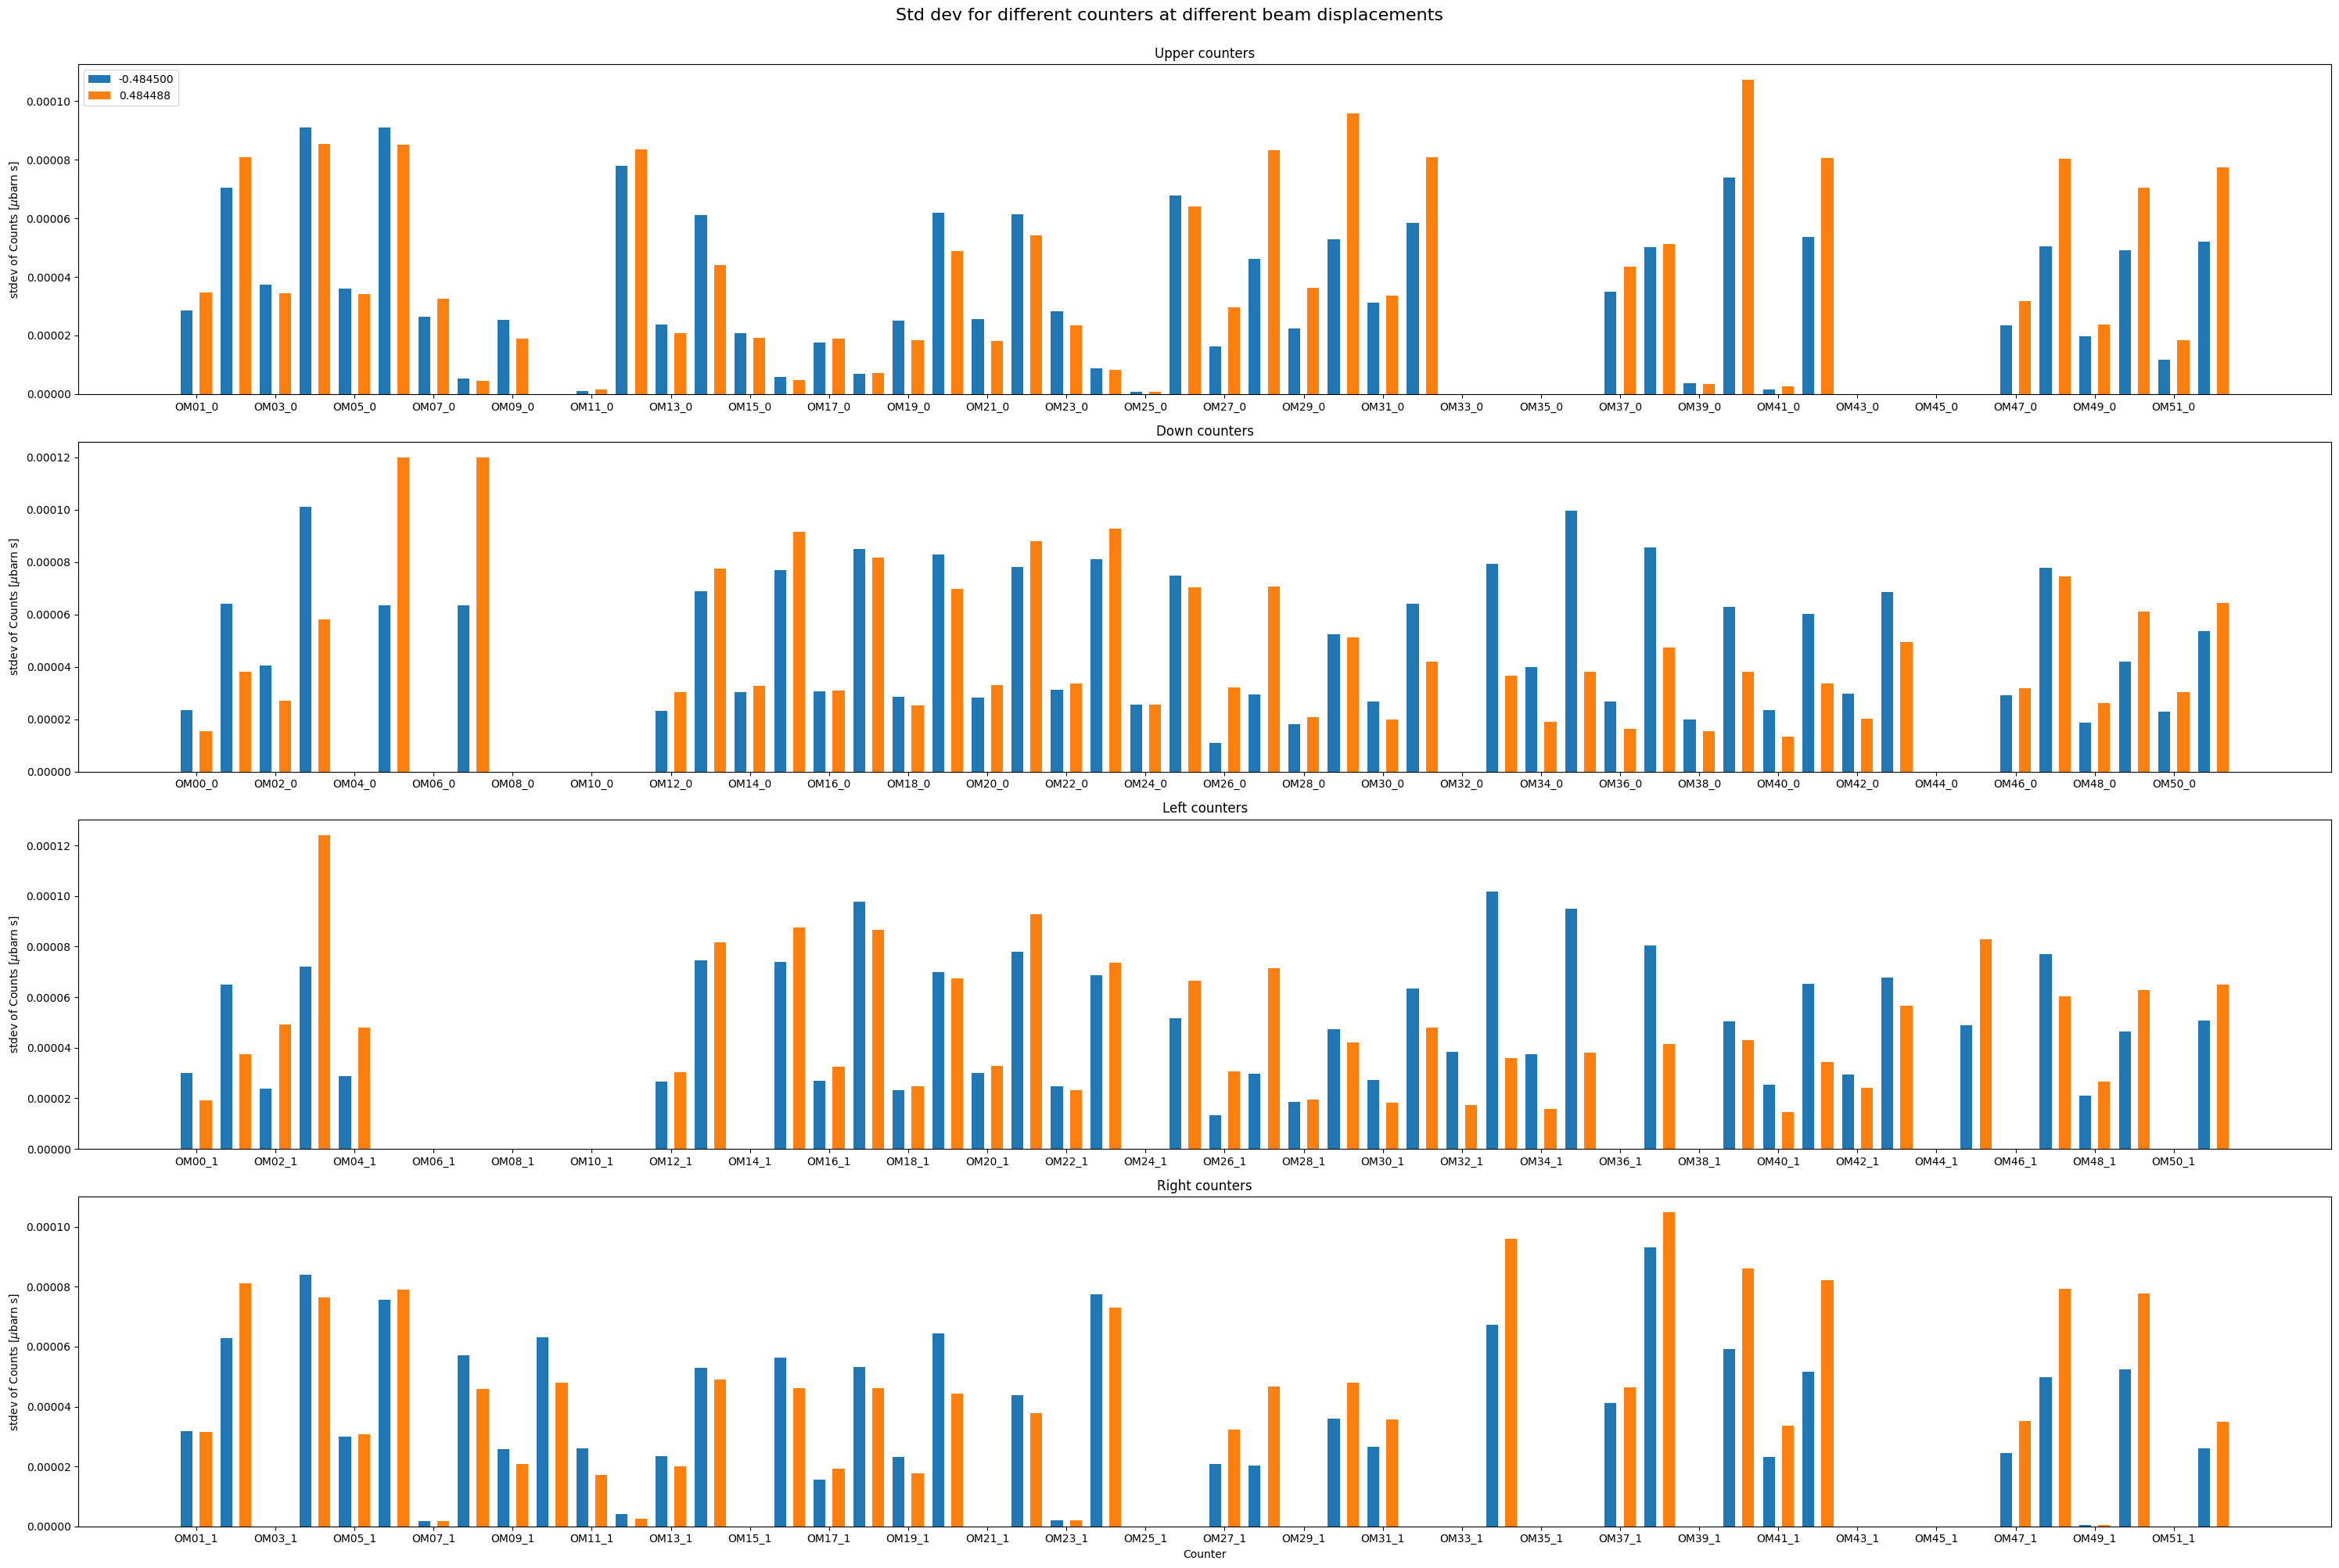

In [81]:
# Create subplots for different categories of counters
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=False, figsize=(30, 20))
width = 0.3       # the width of the bars

# Upper counters
axes[0].bar(np.arange(52)-0.8*width, bin_content1_up, label="-0.484500",width=0.3)
#axes[0].bar(np.arange(52), bin_content2_up, label="0.0",width=0.3)
axes[0].bar(np.arange(52)+0.8*width, bin_content3_up, label="0.484488",width=0.3)
axes[0].set_xticks(np.arange(0, 52, 2), minor=False)
axes[0].set_xticklabels(bin_names_up[::2], fontdict=None, minor=False)
axes[0].set_ylabel("stdev of Counts [$\mu$barn s]")
axes[0].set_title("Upper counters")

# Down counters
axes[1].bar(np.arange(52)-0.8*width, bin_content1_down, label="-0.484500",width=0.3)
#axes[1].bar(np.arange(52), bin_content2_down, label="0.0",width=0.3)
axes[1].bar(np.arange(52)+0.8*width, bin_content3_down, label="0.484488",width=0.3)
axes[1].set_xticks(np.arange(0, 52, 2), minor=False)
axes[1].set_xticklabels(bin_names_down[::2], fontdict=None, minor=False)
axes[1].set_ylabel("stdev of Counts [$\mu$barn s]")
axes[1].set_title("Down counters")

# Left counters
axes[2].bar(np.arange(52)-0.8*width, bin_content1_left, label="-0.484500",width=0.3)
#axes[2].bar(np.arange(52), bin_content2_left, label="0.0",width=0.3)
axes[2].bar(np.arange(52)+0.8*width, bin_content3_left, label="0.484488",width=0.3)
axes[2].set_xticks(np.arange(0, 52, 2), minor=False)
axes[2].set_xticklabels(bin_names_left[::2], fontdict=None, minor=False)
axes[2].set_ylabel("stdev of Counts [$\mu$barn s]")
axes[2].set_title("Left counters")

# Right counters
axes[3].bar(np.arange(52)-0.8*width, bin_content1_right, label="-0.484500",width=0.3)
#axes[3].bar(np.arange(52), bin_content2_right, label="0.0",width=0.3)
axes[3].bar(np.arange(52)+0.8*width, bin_content3_right, label="0.484488",width=0.3)
axes[3].set_xticks(np.arange(0, 52, 2), minor=False)
axes[3].set_xticklabels(bin_names_right[::2], fontdict=None, minor=False)
axes[3].set_ylabel("stdev of Counts [$\mu$barn s]")
axes[3].set_xlabel("Counter")
axes[3].set_title("Right counters")

# Add legend
axes[0].legend(loc='upper left')

# Add title
fig.suptitle('Std dev for different counters at different beam displacements', fontsize=16, y=1.0)
plt.tight_layout()
# Save the plot
plt.savefig('./stdev_counters_x.pdf')
# Show the plot

plt.show()


In [115]:
ratio_pos_down = MC_05_down/bin_content3_down
ratio_pos_up = MC_05_up/bin_content3_up
ratio_pos_left = MC_05_left/bin_content1_left
ratio_pos_right = MC_05_right/bin_content1_right
ratio_neg_down = MC_n05_down/bin_content3_down
ratio_neg_up = MC_n05_up/bin_content3_up
ratio_neg_left = MC_n05_left/bin_content1_left
ratio_neg_right = MC_n05_right/bin_content1_right

In [116]:
bin_names_all = [bin_names_down, bin_names_left, bin_names_up, bin_names_right] 

In [117]:
bin_contents_all = [bin_content1_down, bin_content1_left, bin_content1_up, bin_content1_right]

In [118]:
ratio_all = [ratio_neg_down, ratio_neg_left, ratio_neg_up, ratio_neg_right]

In [119]:
bin_contents_all = np.array(bin_contents_all)
bin_names_all = np.array(bin_names_all)
ratio_all = np.array(ratio_all)

In [121]:
ratio_all.shape

(4, 52)

In [150]:
# Create a mask for nan values
mask = (ratio_all < 250)
#(np.isnan(bin_contents_all))


In [151]:
mask1 = ratio_all >150

In [165]:
mask_off = mask and mask1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [167]:
mask1

array([[ True,  True,  True,  True, False,  True, False,  True, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True, False,
         True, False,  True,  True,  True, False,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  Tr

In [154]:
good_counters_ratio = bin_names_all[mask_off]

In [156]:
len(good_counters_ratio)

143

In [132]:
good_counters_ratio = [counter[1:] + counter[:1] for counter in good_counters_ratio]
good_counters_ratio = [counter.replace('O', 'A').replace('I', 'B') for counter in good_counters_ratio]
good_counters_ratio.sort()
good_counters_ratio = [counter.replace('A', '_outer').replace('B', '_inner') for counter in good_counters_ratio]
good_counters_ratio

In [73]:
good_counters = []
for j in range(0,52):
    if (mask[0][j] == False and mask[1][j] == False and mask[2][j] == False and mask[3][j] == False):
        good_counters.append(bin_names_all[0][j])
        good_counters.append(bin_names_all[1][j])
        good_counters.append(bin_names_all[2][j])
        good_counters.append(bin_names_all[3][j])



In [63]:
len(good_counters)

100

In [74]:
good_counters = [counter[1:] + counter[:1] for counter in good_counters]
good_counters = [counter.replace('O', '_outer').replace('I', '_inner') for counter in good_counters]



In [139]:
tmp = good_counters_ratio

In [140]:
formatted_list = []
check_list = []
# Estraiamo gli indici dalla lista originale
indices = set(int(item[1:3]) for item in tmp)

# Ciclo sugli indici
for i in range(0,26):
    if(f"M{2*i:02d}_0_outer" in tmp):
        formatted_list.append(f"numclusterod{i}")
        check_list.append(f"M{2*i:02d}_0_outer")
    if(f"M{2*i:02d}_0_inner" in tmp):
        formatted_list.append(f"numclusterid{i}")
        check_list.append(f"M{2*i:02d}_0_inner")
    if(f"M{2*i:02d}_1_outer" in tmp):
        formatted_list.append(f"numclusterol{i}")
        check_list.append(f"M{2*i:02d}_1_outer")
    if(f"M{2*i:02d}_1_inner" in tmp): 
        formatted_list.append(f"numclusteril{i}")
        check_list.append(f"M{2*i:02d}_1_inner")
    if(f"M{2*i+1:02d}_0_outer" in tmp):
        formatted_list.append(f"numclusterou{i}")
        check_list.append(f"M{2*i+1:02d}_0_outer")
    if(f"M{2*i+1:02d}_0_inner" in tmp):
        formatted_list.append(f"numclusteriu{i}")
        check_list.append(f"M{2*i+1:02d}_0_inner")
    if(f"M{2*i+1:02d}_1_outer" in tmp):
        formatted_list.append(f"numclusteror{i}")
        check_list.append(f"M{2*i+1:02d}_1_outer")
    if(f"M{2*i+1:02d}_1_inner" in tmp):
        formatted_list.append(f"numclusterir{i}")
        check_list.append(f"M{2*i+1:02d}_1_inner")


formatted_output = '\n'.join(formatted_list)
print(formatted_list)

['numclusterod0', 'numclusterid0', 'numclusterol0', 'numclusteril0', 'numclusterou0', 'numclusteriu0', 'numclusteror0', 'numclusterir0', 'numclusterod1', 'numclusterid1', 'numclusterol1', 'numclusteril1', 'numclusterou1', 'numclusteriu1', 'numclusterir1', 'numclusterid2', 'numclusterol2', 'numclusterou2', 'numclusteriu2', 'numclusteror2', 'numclusterir2', 'numclusterid3', 'numclusterou3', 'numclusterir3', 'numclusterou4', 'numclusteror4', 'numclusterir4', 'numclusteriu5', 'numclusteror5', 'numclusterod6', 'numclusterid6', 'numclusterol6', 'numclusteril6', 'numclusterou6', 'numclusteriu6', 'numclusteror6', 'numclusterir6', 'numclusterod7', 'numclusterid7', 'numclusteril7', 'numclusterou7', 'numclusterir7', 'numclusterod8', 'numclusterid8', 'numclusterol8', 'numclusteril8', 'numclusterou8', 'numclusteror8', 'numclusterir8', 'numclusterod9', 'numclusterid9', 'numclusterol9', 'numclusteril9', 'numclusterou9', 'numclusteriu9', 'numclusteror9', 'numclusterir9', 'numclusterod10', 'numclusteri

In [144]:
check_list

['M00_0_outer',
 'M00_0_inner',
 'M00_1_outer',
 'M00_1_inner',
 'M01_0_outer',
 'M01_0_inner',
 'M01_1_outer',
 'M01_1_inner',
 'M02_0_outer',
 'M02_0_inner',
 'M02_1_outer',
 'M02_1_inner',
 'M03_0_outer',
 'M03_0_inner',
 'M03_1_inner',
 'M04_0_inner',
 'M04_1_outer',
 'M05_0_outer',
 'M05_0_inner',
 'M05_1_outer',
 'M05_1_inner',
 'M06_0_inner',
 'M07_0_outer',
 'M07_1_inner',
 'M09_0_outer',
 'M09_1_outer',
 'M09_1_inner',
 'M11_0_inner',
 'M11_1_outer',
 'M12_0_outer',
 'M12_0_inner',
 'M12_1_outer',
 'M12_1_inner',
 'M13_0_outer',
 'M13_0_inner',
 'M13_1_outer',
 'M13_1_inner',
 'M14_0_outer',
 'M14_0_inner',
 'M14_1_inner',
 'M15_0_outer',
 'M15_1_inner',
 'M16_0_outer',
 'M16_0_inner',
 'M16_1_outer',
 'M16_1_inner',
 'M17_0_outer',
 'M17_1_outer',
 'M17_1_inner',
 'M18_0_outer',
 'M18_0_inner',
 'M18_1_outer',
 'M18_1_inner',
 'M19_0_outer',
 'M19_0_inner',
 'M19_1_outer',
 'M19_1_inner',
 'M20_0_outer',
 'M20_0_inner',
 'M20_1_outer',
 'M20_1_inner',
 'M21_0_outer',
 'M21_0_

In [82]:
maybe_all_counters = [counter[1:] + counter[:1] for counter in bin_names]

In [84]:
maybe_all_counters = [counter.replace('O', '_outer').replace('I', '_inner') for counter in maybe_all_counters]

In [86]:
missing_counters = [counter for counter in maybe_all_counters if counter not in check_list]

In [87]:
missing_counters

['M02_0_outer',
 'M02_1_outer',
 'M03_0_outer',
 'M03_1_outer',
 'M04_0_outer',
 'M04_0_inner',
 'M04_1_outer',
 'M04_1_inner',
 'M05_0_outer',
 'M05_0_inner',
 'M05_1_outer',
 'M05_1_inner',
 'M06_0_outer',
 'M06_0_inner',
 'M06_1_outer',
 'M06_1_inner',
 'M07_0_outer',
 'M07_0_inner',
 'M07_1_outer',
 'M07_1_inner',
 'M08_0_outer',
 'M08_0_inner',
 'M08_1_outer',
 'M08_1_inner',
 'M09_0_outer',
 'M09_0_inner',
 'M09_1_outer',
 'M09_1_inner',
 'M10_0_outer',
 'M10_0_inner',
 'M10_1_outer',
 'M10_1_inner',
 'M11_0_outer',
 'M11_0_inner',
 'M11_1_outer',
 'M11_1_inner',
 'M14_0_outer',
 'M14_1_outer',
 'M15_0_outer',
 'M15_1_outer',
 'M20_0_outer',
 'M20_1_outer',
 'M21_0_outer',
 'M21_1_outer',
 'M24_0_outer',
 'M24_0_inner',
 'M24_1_outer',
 'M24_1_inner',
 'M25_0_outer',
 'M25_0_inner',
 'M25_1_outer',
 'M25_1_inner',
 'M28_0_outer',
 'M28_1_outer',
 'M29_0_outer',
 'M29_1_outer',
 'M30_0_inner',
 'M30_1_inner',
 'M31_0_inner',
 'M31_1_inner',
 'M32_0_outer',
 'M32_0_inner',
 'M32_1_

100

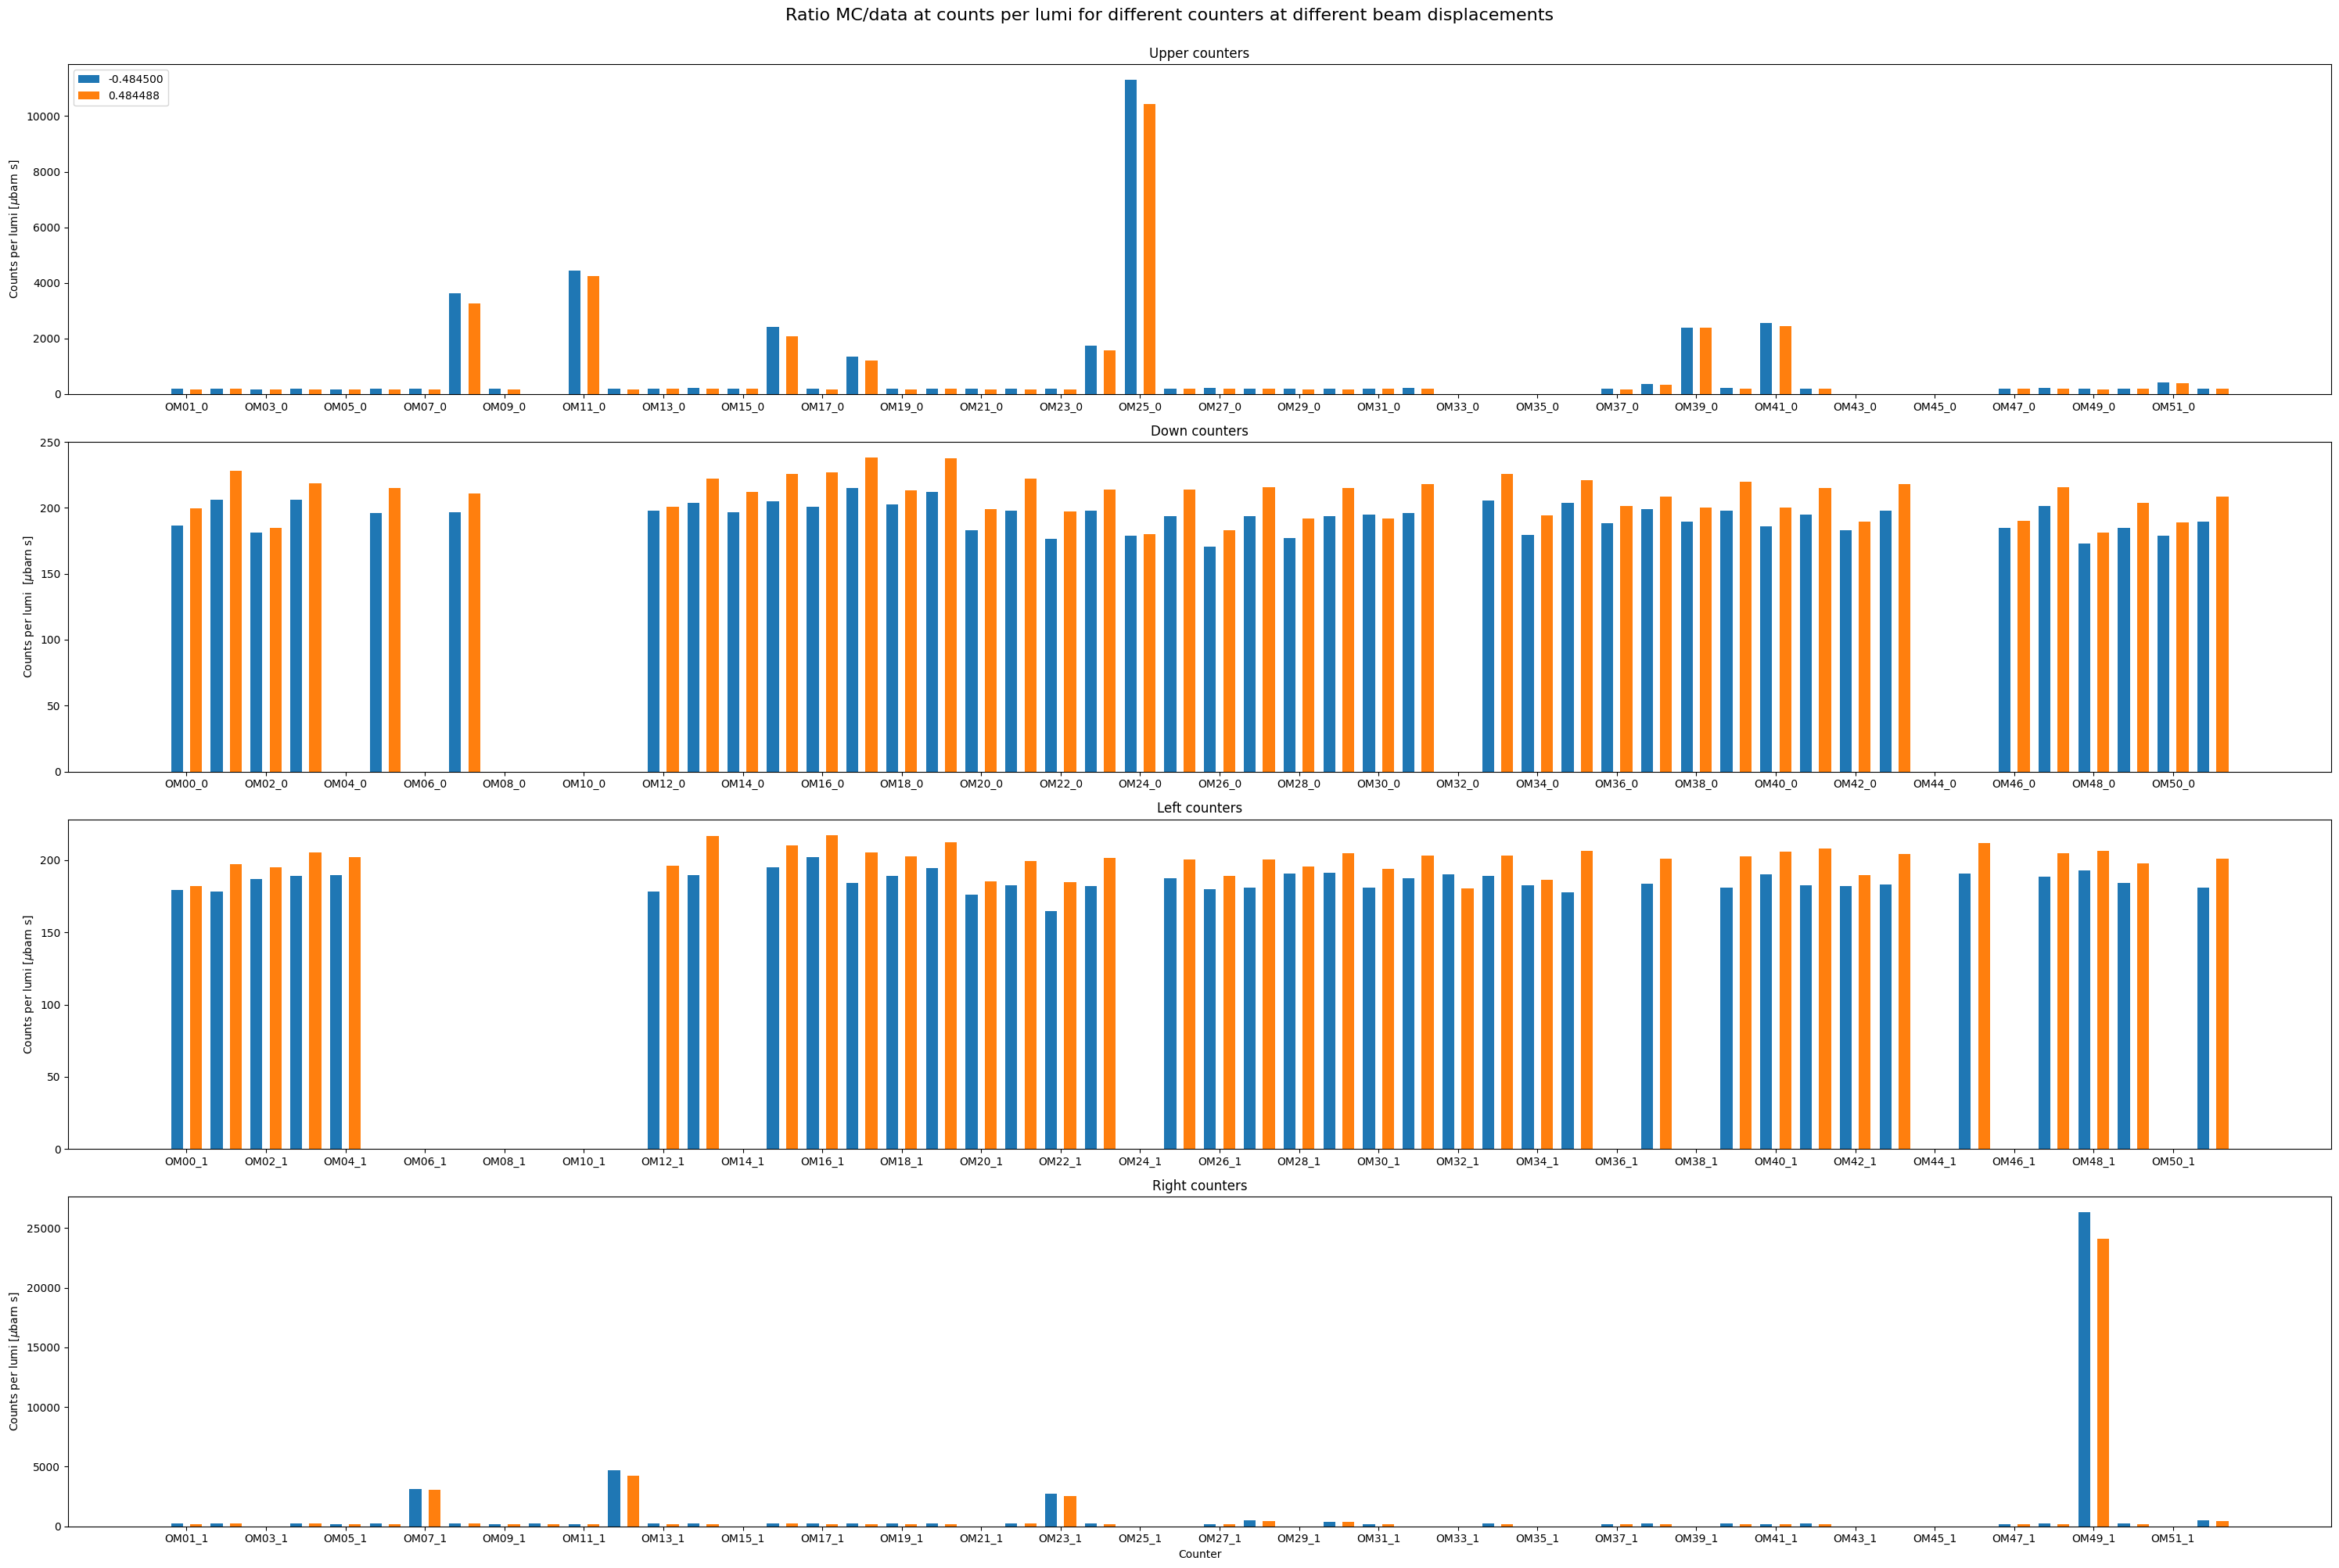

In [42]:
# Create subplots for different categories of counters
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=False, figsize=(30, 20))
width = 0.3       # the width of the bars

# Upper counters
axes[0].bar(np.arange(52)-0.8*width, ratio_pos_up, label="-0.484500",width=0.3)
#axes[0].bar(np.arange(52), bin_content2_up, label="0.0",width=0.3)
axes[0].bar(np.arange(52)+0.8*width, ratio_neg_up, label="0.484488",width=0.3)
axes[0].set_xticks(np.arange(0, 52, 2), minor=False)
axes[0].set_xticklabels(bin_names_up[::2], fontdict=None, minor=False)
axes[0].set_ylabel("Counts per lumi [$\mu$barn s]")
axes[0].set_title("Upper counters")

# Down counters
axes[1].bar(np.arange(52)-0.8*width, ratio_pos_down, label="-0.484500",width=0.3)
#axes[1].bar(np.arange(52), bin_content2_down, label="0.0",width=0.3)
axes[1].bar(np.arange(52)+0.8*width, ratio_neg_down, label="0.484488",width=0.3)
axes[1].set_xticks(np.arange(0, 52, 2), minor=False)
axes[1].set_xticklabels(bin_names_down[::2], fontdict=None, minor=False)
axes[1].set_ylabel("Counts per lumi  [$\mu$barn s]")
axes[1].set_title("Down counters")

# Left counters
axes[2].bar(np.arange(52)-0.8*width, ratio_pos_left, label="-0.484500",width=0.3)
#axes[2].bar(np.arange(52), bin_content2_left, label="0.0",width=0.3)
axes[2].bar(np.arange(52)+0.8*width, ratio_neg_left, label="0.484488",width=0.3)
axes[2].set_xticks(np.arange(0, 52, 2), minor=False)
axes[2].set_xticklabels(bin_names_left[::2], fontdict=None, minor=False)
axes[2].set_ylabel("Counts per lumi [$\mu$barn s]")
axes[2].set_title("Left counters")

# Right counters
axes[3].bar(np.arange(52)-0.8*width, ratio_pos_right, label="-0.484500",width=0.3)
#axes[3].bar(np.arange(52), bin_content2_right, label="0.0",width=0.3)
axes[3].bar(np.arange(52)+0.8*width, ratio_neg_right, label="0.484488",width=0.3)
axes[3].set_xticks(np.arange(0, 52, 2), minor=False)
axes[3].set_xticklabels(bin_names_right[::2], fontdict=None, minor=False)
axes[3].set_ylabel("Counts per lumi [$\mu$barn s]")
axes[3].set_xlabel("Counter")
axes[3].set_title("Right counters")

# Add legend
axes[0].legend(loc='upper left')

# Add title
fig.suptitle('Ratio MC/data at counts per lumi for different counters at different beam displacements', fontsize=16, y=1.0)
plt.tight_layout()
# Save the plot
#plt.savefig('./MC_comparison_counters_x.pdf')
# Show the plot

plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yaml

In [4]:
stream = open("../../beamline_estimation/config/pca_x_2022.yaml", "r", encoding="utf-8")
config_dictionary_pca = yaml.safe_load(stream)

In [5]:
working_counters = config_dictionary_pca["working_counters"]

KeyError: 'working_counters'